# U4: Ejemplo de human activity recognition

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

### Import data

In [13]:
dirs = []
for dirname, _, filenames in os.walk(r'DataSet\Inertia Sensors for Human Activity Recognition'):
    for filename in filenames:
        dirs.append(os.path.join(dirname, filename))
print(dirs)

['DataSet\\Inertia Sensors for Human Activity Recognition\\Inertia Sensors for Human Activity Recognition.zip', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Cycling.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Football.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Jogging.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\JumpRope.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Pushups.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Sitting.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Swimming.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\Walking.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\WalkingDownstairs.csv', 'DataSet\\Inertia Sensors for Human Activity Recognition\\WalkingUpstairs.csv']


In [14]:
df = [] 
print("Reading files...")
file_size_sum = 0
for dir in dirs:
    _, filename = os.path.split(dir)
    if filename.endswith('.csv'):
        temp_df = pd.read_csv(dir)
        file_size = round(os.path.getsize(dir) / 1000000, 2)
        print("\t" + "Loading " + filename + " (" + str(file_size) + " MB)"  + "...")
        file_size_sum += file_size
        temp_df['activity'] = os.path.splitext(filename)[0]
        # Sort the data by the time column
        temp_df.sort_values(by=['Time since start in ms '], inplace=True)
        temp_df.reset_index(drop=True, inplace=True)
        df.append(temp_df)
df = pd.concat(df)
print("Total file size loaded: " + str(round(file_size_sum, 2)) + " MB")
print("Final DataFrame of shape " + str(df.shape))

Reading files...
	Loading Cycling.csv (0.78 MB)...
	Loading Football.csv (1.07 MB)...
	Loading Jogging.csv (0.04 MB)...
	Loading JumpRope.csv (0.35 MB)...
	Loading Pushups.csv (0.05 MB)...
	Loading Sitting.csv (1.93 MB)...
	Loading Swimming.csv (0.32 MB)...
	Loading Walking.csv (0.17 MB)...
	Loading WalkingDownstairs.csv (0.23 MB)...
	Loading WalkingUpstairs.csv (0.26 MB)...
Total file size loaded: 5.2 MB
Final DataFrame of shape (46013, 15)


### Data cleaning

In [15]:
# show the entries that are duplicated
print('Number of duplicates in data: {}'.format(sum(df.duplicated())))
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10)

Number of duplicates in data: 13607


,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS,activity
5551,-48.8492,-54.4711,4.0917,-5.8894,-7.8372,0.2522,0.0,0.0,0.0,-3.7814,-3.0959,-1.5703,1842248,2021-05-02 14:02:38:450,Football
5552,-48.8492,-54.4711,4.0917,-5.8894,-7.8372,0.2522,0.0,0.0,0.0,-3.7814,-3.0959,-1.5703,1842248,2021-05-02 14:02:38:450,Football
3753,-40.3391,-40.6319,15.0903,-4.8201,-8.5391,0.1449,0.0,0.0,0.0,-4.9396,-4.0021,-1.0746,1310236,2021-05-02 13:53:46:438,Football
3754,-40.3391,-40.6319,15.0903,-4.8201,-8.5391,0.1449,0.0,0.0,0.0,-4.9396,-4.0021,-1.0746,1310236,2021-05-02 13:53:46:438,Football
8523,-38.9818,31.9870,51.7941,-1.8850,-9.5919,0.7821,0.0,0.0,0.0,-2.4690,-1.3645,-1.5378,2724370,2021-05-02 14:17:20:572,Football
8524,-38.9818,31.9870,51.7941,-1.8850,-9.5919,0.7821,0.0,0.0,0.0,-2.4690,-1.3645,-1.5378,2724370,2021-05-02 14:17:20:572,Football
4271,-36.9888,-26.1799,9.4113,-7.6714,-6.0138,1.0743,0.0,0.0,0.0,-0.1991,-0.4826,0.5456,1461790,2021-05-02 13:56:17:992,Football
4272,-36.9888,-26.1799,9.4113,-7.6714,-6.0138,1.0743,0.0,0.0,0.0,-0.1991,-0.4826,0.5456,1461790,2021-05-02 13:56:17:992,Football
5696,-29.7586,21.5788,-22.1118,-7.7811,5.6552,1.9089,0.0,0.0,0.0,1.2561,-1.8678,-1.8979,1884322,2021-05-02 14:03:20:524,Football
5697,-29.7586,21.5788,-22.1118,-7.7811,5.6552,1.9089,0.0,0.0,0.0,1.2561,-1.8678,-1.8979,1884322,2021-05-02 14:03:20:524,Football


In [16]:
df.drop_duplicates(inplace=True)
print('Number of duplicates in data: {}'.format(sum(df.duplicated())))

Number of duplicates in data: 0


## Exploratory analysis

activity
Sitting              8773
Football             8474
Cycling              5824
Swimming             2091
JumpRope             1835
WalkingUpstairs      1814
WalkingDownstairs    1450
Walking              1432
Pushups               413
Jogging               300
Name: count, dtype: int64


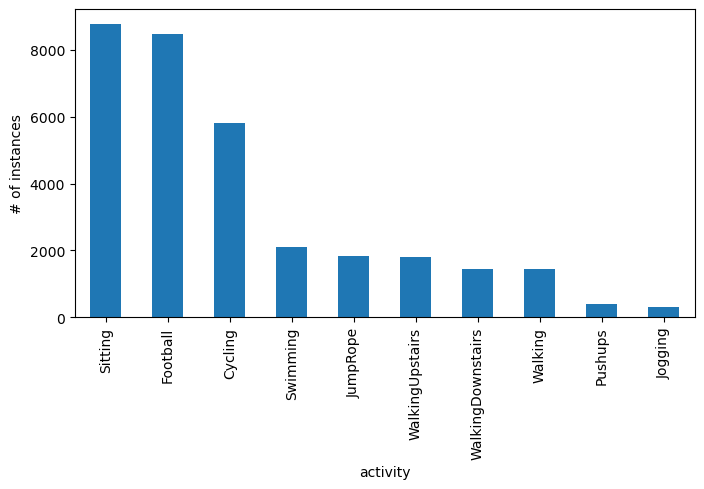

In [17]:
activity_stats = df.activity.value_counts()
print(activity_stats)

activity_stats.plot(kind='bar', figsize=(8,4))
plt.ylabel('# of instances')
plt.show()

In [18]:
# Estimate the total acceleration vector
df['ACCELEROMETER TOTAL (m/s²)'] = np.sqrt(df['ACCELEROMETER X (m/s²)']**2 + df['ACCELEROMETER Y (m/s²)']**2 + df['ACCELEROMETER Z (m/s²)']**2)
print(df[['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 'ACCELEROMETER TOTAL (m/s²)']].head())

   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                 -0.8857                 -0.9150                  9.5503   
1                  2.0566                  5.3061                  5.6839   
2                 -3.0620                 -1.2430                  9.2900   
3                 -1.4557                 -1.0295                 13.7236   
4                 -1.0800                  1.2900                 10.5850   

   ACCELEROMETER TOTAL (m/s²)  
0                    9.634828  
1                    8.043073  
2                    9.860273  
3                   13.838935  
4                   10.717869  


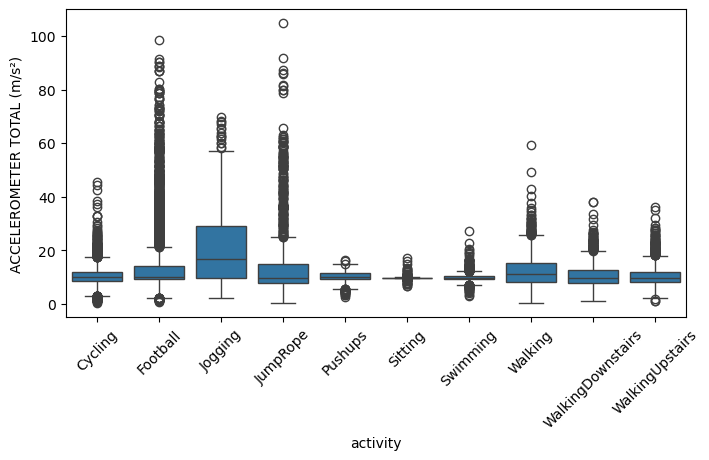

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='activity', y='ACCELEROMETER TOTAL (m/s²)', data=df)
plt.xticks(rotation=45)  # This rotates the x-axis labels to make them more readable if necessary
plt.show()

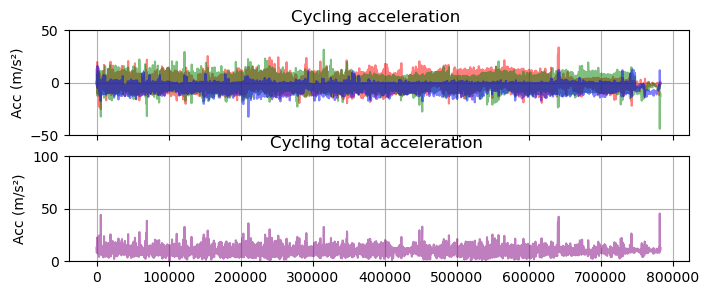

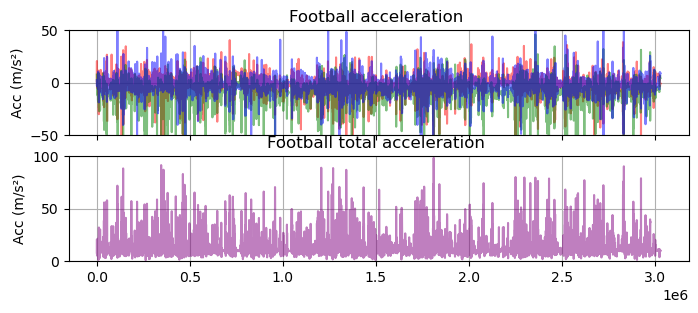

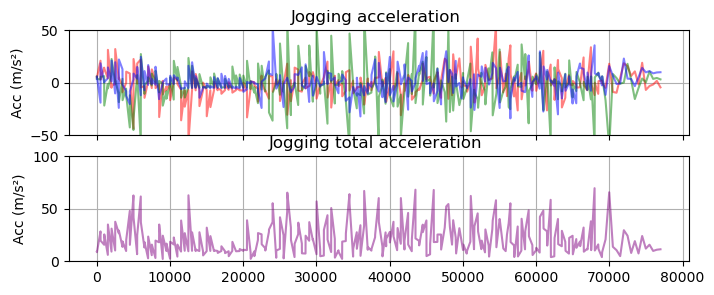

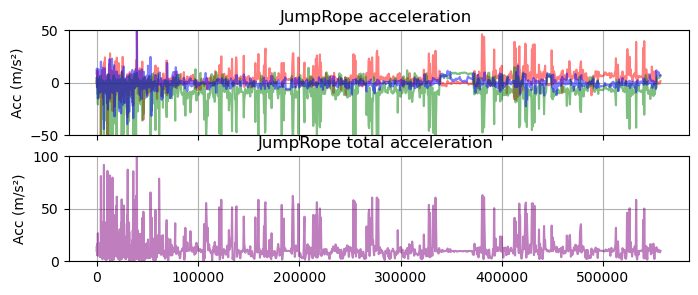

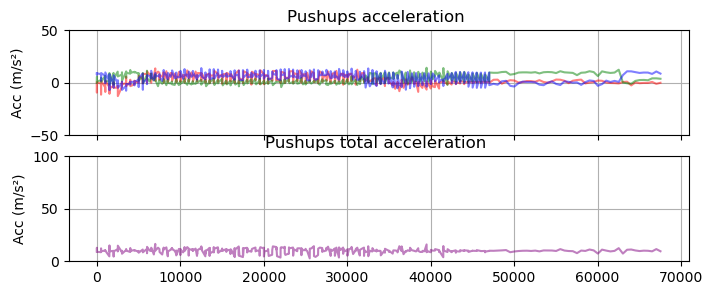

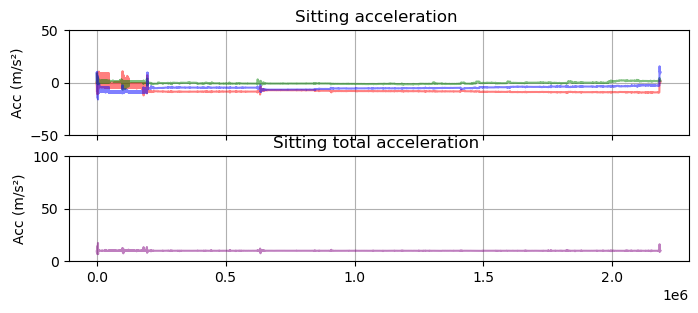

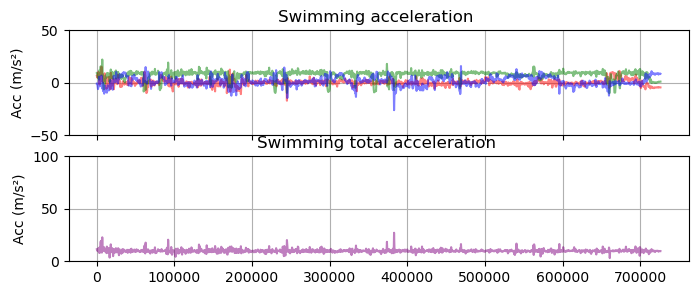

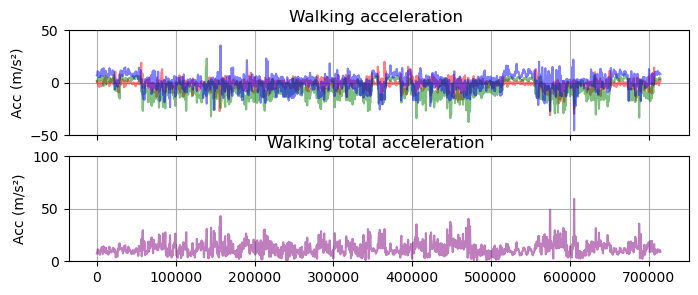

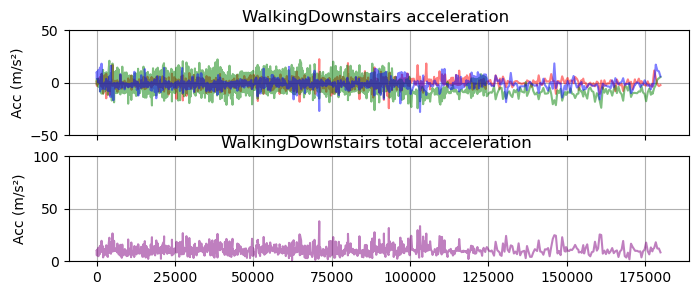

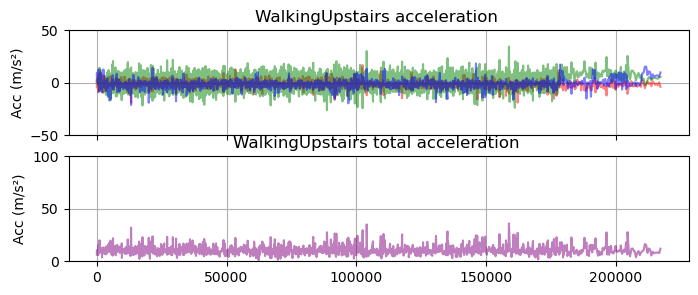

In [20]:
# Plotting time-series
for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    
    ax1.plot(time, df_temp['ACCELEROMETER X (m/s²)'].values, color='red', alpha=0.5)
    ax1.plot(time, df_temp['ACCELEROMETER Y (m/s²)'].values, color='green', alpha=0.5)
    ax1.plot(time, df_temp['ACCELEROMETER Z (m/s²)'].values, color='blue', alpha=0.5)    
    ax1.set_ylim(-50,50)
    ax1.set_title(activity + ' acceleration ')
    ax1.set_ylabel('Acc (m/s²)')  
    ax1.grid()
    
    ax2.plot(time, df_temp['ACCELEROMETER TOTAL (m/s²)'].values, color='purple', alpha=0.5)
    ax2.set_ylim(0,100)
    ax2.set_title(activity + ' total acceleration ')
    ax2.set_ylabel('Acc (m/s²)')      
    ax2.grid()
    
    plt.show()

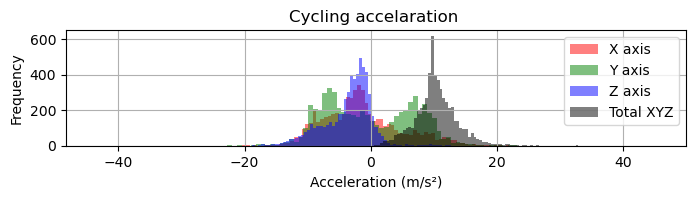

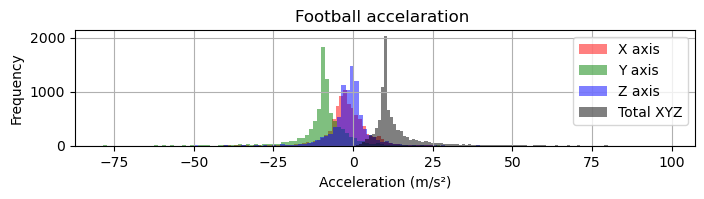

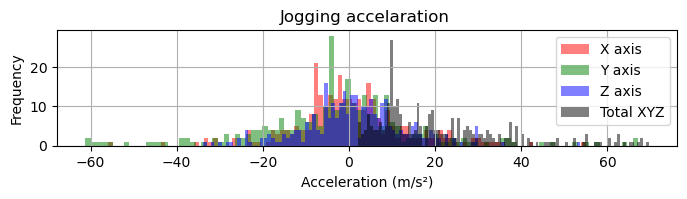

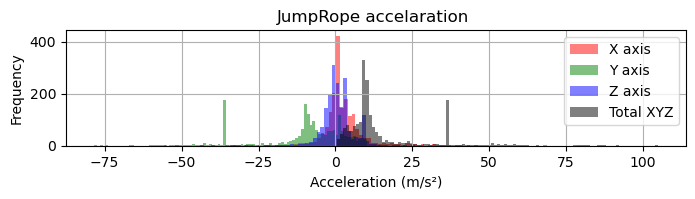

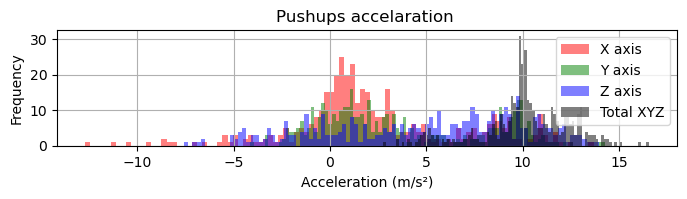

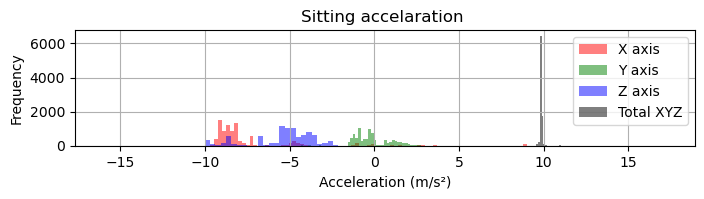

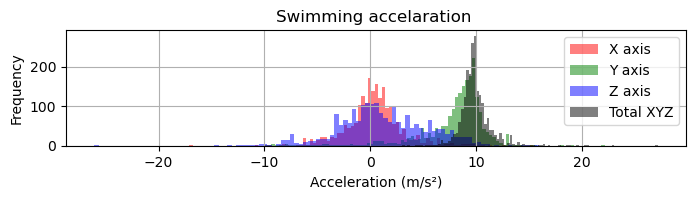

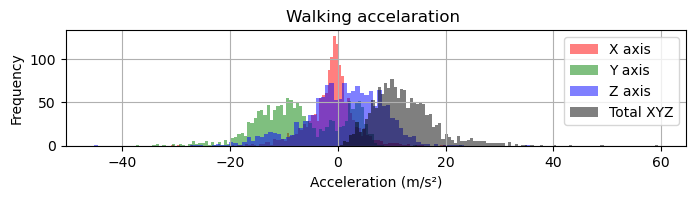

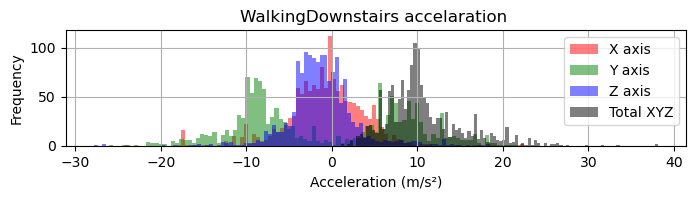

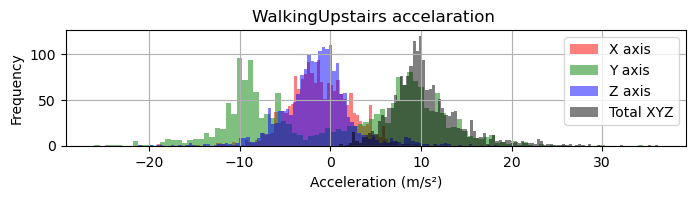

In [21]:
# distribution plots
n_bins = 100

for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 1.5), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    ax1.hist( df_temp['ACCELEROMETER X (m/s²)'].values, bins=n_bins, color='red', alpha=0.5, label='X axis')
    ax1.hist( df_temp['ACCELEROMETER Y (m/s²)'].values, bins=n_bins, color='green', alpha=0.5, label='Y axis')
    ax1.hist( df_temp['ACCELEROMETER Z (m/s²)'].values, bins=n_bins, color='blue', alpha=0.5, label='Z axis')
    ax1.hist( df_temp['ACCELEROMETER TOTAL (m/s²)'].values, bins=n_bins, color='black', alpha=0.5, label='Total XYZ')
    ax1.set_title(activity + ' accelaration ')
    ax1.set_xlabel('Acceleration (m/s²)')  
    ax1.set_ylabel('Frequency')  
    ax1.grid(True)
    ax1.legend(loc='upper right')
    
    plt.show()

## Feature extraction

In [ ]:
#!pip install tsfel

In [25]:
import tsfel

In [26]:
# Only work with one variable
df_filtered = df[['ACCELEROMETER TOTAL (m/s²)', 'activity']]
print(df_filtered)

      ACCELEROMETER TOTAL (m/s²)         activity
0                       9.634828          Cycling
1                       8.043073          Cycling
2                       9.860273          Cycling
3                      13.838935          Cycling
4                      10.717869          Cycling
...                          ...              ...
2319                    8.195395  WalkingUpstairs
2320                    8.188006  WalkingUpstairs
2321                    8.355823  WalkingUpstairs
2322                    7.723241  WalkingUpstairs
2323                   12.015776  WalkingUpstairs

[32406 rows x 2 columns]


In [ ]:
# Get TSFEL default configuration for time series: "statistical", "temporal", "spectral"
cfg = tsfel.get_features_by_domain()

# Initialize an empty DataFrame for the feature vectors
features_df = pd.DataFrame()

# Define segment size
segment_size = 50

for activity, group in df_filtered.groupby('activity'):
    num_segments = np.ceil(len(group) / segment_size).astype(int)
    
    for segment in range(num_segments):
        segment_slice = group.iloc[segment*segment_size:(segment+1)*segment_size]['ACCELEROMETER TOTAL (m/s²)']
        
        if len(segment_slice) == segment_size:  # Ensure only full segments are processed
            # Ensure segment_slice is in the correct format for TSFEL
            segment_data = segment_slice.values.reshape(-1, 1)
            
            warnings.filterwarnings("ignore", category=RuntimeWarning)            
            # Calculate features for this segment
            features = tsfel.time_series_features_extractor(cfg, segment_data, fs=1, verbose=0)
            warnings.filterwarnings("default", category=RuntimeWarning)
            
            # Check if features is a DataFrame and then add the activity label
            if isinstance(features, pd.DataFrame):
                features['activity'] = activity  # Add activity label safely
                features_df = pd.concat([features_df, features], ignore_index=True)

c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\tsfel\feature_extraction\calc_features.py:182: SyntaxWarning: invalid escape sequence '\*'
  """Extraction of time series features.


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
print(features_df.shape)
print(features_df.head())

(644, 160)
   0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0        7131.280173              554.973215        7131.280173   
1        7414.586523              538.547908        7414.586523   
2        6095.212431              522.559127        6095.212431   
3        6286.874064              515.358286        6286.874064   
4        6301.985824              526.640025        6301.985824   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0       145.536330   24.093384                       10.0   
1       151.318092   20.667547                       10.0   
2       124.392090   22.805812                       10.0   
3       128.303552   25.372232                       10.0   
4       128.611956   24.104325                       10.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                       40.0             9.295770            13.495868   
1                       40.0             8.767257            12.138912 

In [ ]:
file_path = ("X_features.csv")

try:
    features_df.to_csv(file_path, index=False)
    print(f"DataFrame saved successfully to {file_path}")
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")

DataFrame saved successfully to X_features.csv


## Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Read the CSV file
df = pd.read_csv('X_features.csv')
df = df.dropna() 

# Separate features and target variable
X = df.drop('activity', axis=1)  # Assuming 'activity' is the class label
y = df['activity']

# Encode the target variable if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Perform Feature Selection
# Select the top 16 features based on mutual information
selector = SelectKBest(mutual_info_classif, k=15)
X_selected = selector.fit_transform(X, y_encoded)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with the selected features
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['activity'] = y.values

print("# of all features: ", df.shape)
print("# of selected features: ", df_selected.shape)
#print(df_selected.head())

# of all features:  (641, 160)
# of selected features:  (641, 16)


## Classification

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

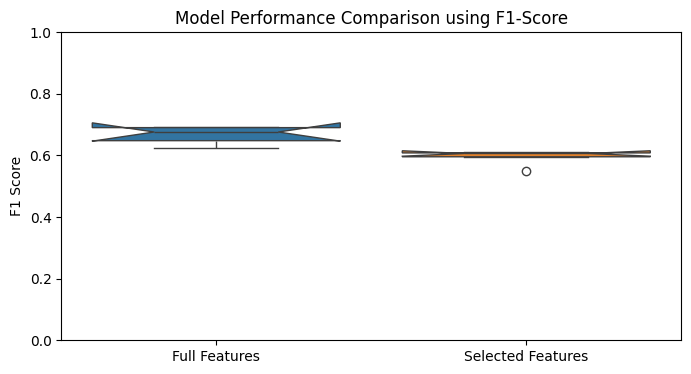

In [ ]:
# Prepare the data
X_full = df.drop('activity', axis=1)
y_full = df['activity']
X_selected = df_selected.drop('activity', axis=1)
y_selected = df_selected['activity']

# Encode the target variable
le = LabelEncoder()
y_full_encoded = le.fit_transform(y_full)
y_selected_encoded = le.transform(y_selected)  # Ensure consistent encoding

# Classifier setup
clf = GaussianNB()

# Cross-validation setup
cv = StratifiedKFold(n_splits=5)

# Model evaluation using F1-score
scores_full = cross_val_score(clf, X_full, y_full_encoded, cv=cv, scoring='f1_weighted')
scores_selected = cross_val_score(clf, X_selected, y_selected_encoded, cv=cv, scoring='f1_weighted')

# Predictions for confusion matrices (needed for F1-score calculation)
predictions_full = cross_val_predict(clf, X_full, y_full_encoded, cv=cv)
predictions_selected = cross_val_predict(clf, X_selected, y_selected_encoded, cv=cv)

# Plotting results
plt.figure(figsize=(8, 4))
sns.boxplot(data=[scores_full, scores_selected], notch=True)
plt.xticks([0, 1], ['Full Features', 'Selected Features'])
plt.title('Model Performance Comparison using F1-Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

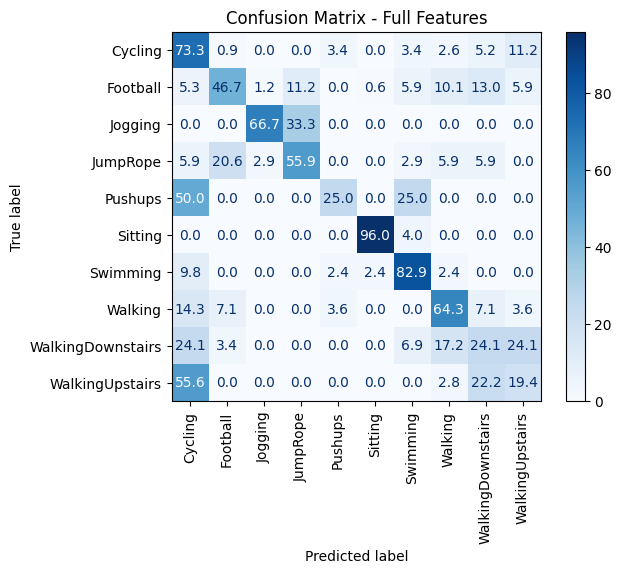

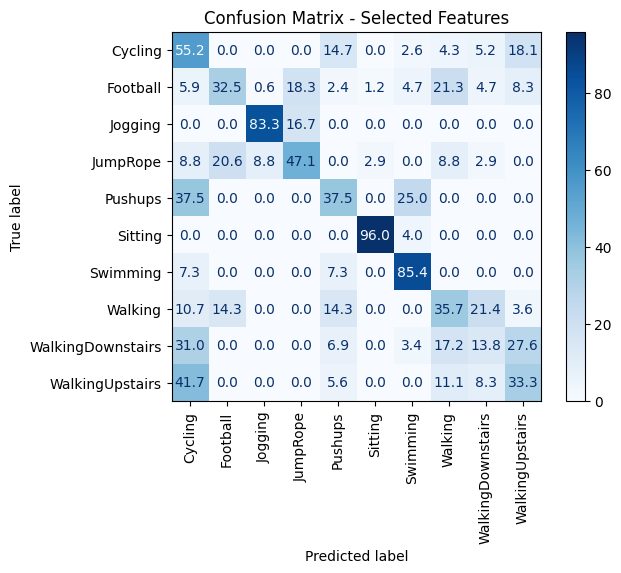

In [ ]:
# Confusion matrices
cm_full = confusion_matrix(y_full_encoded, predictions_full)
cm_selected = confusion_matrix(y_selected_encoded, predictions_selected)

cm_full_norm = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis] * 100
cm_selected_norm = cm_selected.astype('float') / cm_full.sum(axis=1)[:, np.newaxis] * 100

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_labels)
    disp.plot(cmap='Blues', values_format='.1f')  # Un decimal para los porcentajes
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Plotting confusion matrices
activity_labels = le.classes_
plot_confusion_matrix(cm_full_norm, activity_labels, title='Confusion Matrix - Full Features')
plot_confusion_matrix(cm_selected_norm, activity_labels, title='Confusion Matrix - Selected Features')